## CMEMS Timeseries plotting

CMEMS data are provided in the netcdf file formats. This allows relatively easy data analysis and visualisation. This short tutorial will show you how to generate a time series plot for both an area and a point location.

#### imports & basic setup

In [1]:
%matplotlib inline

import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# replace with your path to the directory where your netcdf is
DATA_PATH = os.path.join("C:\\", "Users","docle","Documents","JNCC_shortcourse-master", "CMEMS") # "/Users"
INFILE = "MetO-NWS-WAV-hi_1602666010131.nc" # replace with your file

#### Open netcdf & get variable data out

In [3]:
nc_data = nc.Dataset(os.path.join(DATA_PATH, INFILE))
nc_time_var = nc_data.variables['time']
nc_time_var.ncattrs()

['units',
 'long_name',
 'standard_name',
 'calendar',
 'axis',
 '_ChunkSizes',
 '_CoordinateAxisType',
 'valid_min',
 'valid_max']

In [17]:
nc_time_var[:]

masked_array(data=[1385.        , 1385.04166667, 1385.08333333,
                   1385.125     , 1385.16666667, 1385.20833333,
                   1385.25      , 1385.29166667, 1385.33333333,
                   1385.375     , 1385.41666667, 1385.45833333,
                   1385.5       , 1385.54166667, 1385.58333333,
                   1385.625     , 1385.66666667, 1385.70833333,
                   1385.75      , 1385.79166667, 1385.83333333,
                   1385.875     , 1385.91666667, 1385.95833333,
                   1386.        , 1386.04166667, 1386.08333333,
                   1386.125     , 1386.16666667, 1386.20833333,
                   1386.25      , 1386.29166667, 1386.33333333,
                   1386.375     , 1386.41666667, 1386.45833333,
                   1386.5       , 1386.54166667, 1386.58333333,
                   1386.625     , 1386.66666667, 1386.70833333,
                   1386.75      , 1386.79166667, 1386.83333333,
                   1386.875     , 1386.9

In [18]:
#print(nc_time_var.getncattr('tidddme_origin'))


cal = nc_time_var.getncattr('calendar')
date_units = nc_time_var.getncattr('units')

print(cal)
print(date_units)
print(nc_time_var[:])

gregorian
days since 2017-01-01T00:00:00Z
[1385.         1385.04166667 1385.08333333 1385.125      1385.16666667
 1385.20833333 1385.25       1385.29166667 1385.33333333 1385.375
 1385.41666667 1385.45833333 1385.5        1385.54166667 1385.58333333
 1385.625      1385.66666667 1385.70833333 1385.75       1385.79166667
 1385.83333333 1385.875      1385.91666667 1385.95833333 1386.
 1386.04166667 1386.08333333 1386.125      1386.16666667 1386.20833333
 1386.25       1386.29166667 1386.33333333 1386.375      1386.41666667
 1386.45833333 1386.5        1386.54166667 1386.58333333 1386.625
 1386.66666667 1386.70833333 1386.75       1386.79166667 1386.83333333
 1386.875      1386.91666667 1386.95833333]


In [19]:
dtime = nc.num2date(nc_time_var[:],date_units,calendar=cal, only_use_cftime_datetimes=False)

In [20]:
dtime

array([datetime.datetime(2020, 10, 17, 0, 0),
       datetime.datetime(2020, 10, 17, 1, 0),
       datetime.datetime(2020, 10, 17, 2, 0),
       datetime.datetime(2020, 10, 17, 3, 0),
       datetime.datetime(2020, 10, 17, 4, 0),
       datetime.datetime(2020, 10, 17, 5, 0),
       datetime.datetime(2020, 10, 17, 6, 0),
       datetime.datetime(2020, 10, 17, 7, 0),
       datetime.datetime(2020, 10, 17, 8, 0),
       datetime.datetime(2020, 10, 17, 9, 0),
       datetime.datetime(2020, 10, 17, 10, 0),
       datetime.datetime(2020, 10, 17, 11, 0),
       datetime.datetime(2020, 10, 17, 12, 0),
       datetime.datetime(2020, 10, 17, 13, 0),
       datetime.datetime(2020, 10, 17, 14, 0),
       datetime.datetime(2020, 10, 17, 15, 0),
       datetime.datetime(2020, 10, 17, 16, 0),
       datetime.datetime(2020, 10, 17, 17, 0),
       datetime.datetime(2020, 10, 17, 18, 0),
       datetime.datetime(2020, 10, 17, 19, 0),
       datetime.datetime(2020, 10, 17, 20, 0),
       datetime.datetim

In [21]:
nc_data.variables

OrderedDict([('VHM0_WW',
              <class 'netCDF4._netCDF4.Variable'>
              int16 VHM0_WW(time, latitude, longitude)
                  _FillValue: -32767
                  comment: Wind sea and swells defined using topographic partitions and spectral wave-age cut-off
                  grid_mapping: crs
                  scale_factor: 0.002
                  coordinates: forecast_period forecast_reference_time
                  add_offset: 0.0
                  long_name: Spectral significant wind wave height
                  standard_name: sea_surface_wind_wave_significant_height
                  cell_methods: time:point
                  units: m
                  _ChunkSizes: [   1 1240  958]
              unlimited dimensions: 
              current shape = (48, 1240, 958)
              filling on),
             ('crs',
              <class 'netCDF4._netCDF4.Variable'>
              int32 crs()
                  semi_major_axis: 6378137.0
                  longitude_o

In [22]:
means = []
nc_chl_data = nc_data.variables['VHM0_WW'][:]  
# replace 'CHL' with the variable you are woking with
print(nc_chl_data.shape)
timesteps = nc_chl_data.shape[0]
#holder = np.ndarray()
for x in range(timesteps):
    means.append(np.nanmean(nc_chl_data[x,:]))
    #holder = holder + nc_chl_data[x,:]

#holder / timesteps
# nc_chl_data[3,122,344] 
# [1,2,3,4]

(48, 1240, 958)


[0.56489027, 0.5664335, 0.5683322, 0.5745993, 0.60190165, 0.6294925, 0.6565247, 0.6836476, 0.7048345, 0.72096115, 0.7369635, 0.74275625, 0.7460186, 0.759848, 0.7717386, 0.786615, 0.80866706, 0.82530576, 0.83927, 0.8551876, 0.86084485, 0.8588901, 0.8601502, 0.8515597, 0.84125495, 0.8450971, 0.8421532, 0.8354535, 0.8410298, 0.83471215, 0.8214344, 0.8218075, 0.8109167, 0.7937757, 0.79570764, 0.79215944, 0.78610975, 0.800224, 0.8103434, 0.8197846, 0.84052044, 0.8584085, 0.8774489, 0.9030961, 0.9270053, 0.95274156, 0.9885899, 1.0211806]


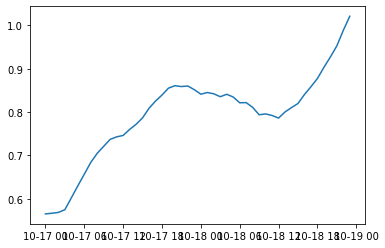

In [23]:
print(means)
plt.clf()
plt.plot(dtime,means)
plt.show()

## single point

In [24]:
LAT = 49.2
LON = -9
# change above to match the are of your file

lat_var = nc_data.variables['latitude'][:]
lon_var = nc_data.variables['longitude'][:]

lat_index = np.argmin(np.abs(lat_var - LAT))   
lon_index = np.argmin(np.abs(lon_var - LON))

print(lat_index,lon_index)


237 231


In [25]:
nc_chl_data.shape

(48, 1240, 958)

In [26]:
point_values = []
nc_chl_data = nc_data.variables['VHM0_WW'][:]
timesteps = nc_chl_data.shape[0]
for x in range(timesteps):
    print(nc_chl_data[x,lat_index,lon_index])
    point_values.append(nc_chl_data[x,lat_index,lon_index])

1.4760001
1.5320001
1.582
1.6600001
1.746
1.8560001
1.9540001
2.0400002
2.1160002
2.176
2.176
2.17
2.154
2.1520002
2.1460001
2.138
2.154
2.2120001
2.266
2.2540002
2.1820002
2.0540001
1.9300001
1.8100001
1.6840001
1.498
1.25
0.794
0.81200004
0.91800004
0.952
0.98800004
0.994
1.008
1.0600001
1.128
1.1960001
1.2720001
1.3540001
1.4380001
1.5220001
1.598
1.6780001
1.7420001
1.8000001
1.8620001
1.9540001
2.0640001


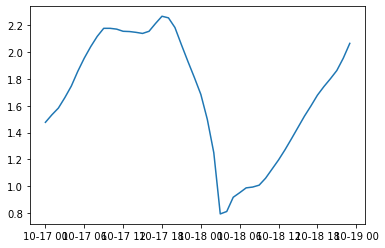

In [27]:
plt.clf()
plt.plot(dtime,point_values)
plt.show()

## Area

In [28]:
LAT = [48.5,49.75]
LON = [-7.2,-5.9]

lat_var = nc_data.variables['latitude'][:]
lon_var = nc_data.variables['longitude'][:]

lat_min_index = np.argmin(np.abs(lat_var - LAT[0]))
lat_max_index = np.argmin(np.abs(lat_var - LAT[1]))

lon_min_index = np.argmin(np.abs(lon_var - LON[0]))
lon_max_index = np.argmin(np.abs(lon_var - LON[1]))


print(lat_min_index,lat_max_index)
print(lon_min_index,lon_max_index)

185 277
290 333


In [33]:
means = []
baseline = []
nc_chl_data = nc_data.variables['VHM0_WW'][:]
timesteps = nc_chl_data.shape[0]
for x in range(timesteps):
    area_mean = np.nanmean(nc_chl_data[x,lat_min_index:lat_max_index,lon_min_index:lon_max_index])
    print(area_mean)
    means.append(area_mean)
    baseline.append(1.0)

0.7768049
0.78777707
0.80759865
0.8370263
0.869951
0.90567493
0.9406841
0.9744642
0.99755716
1.0044819
0.9929884
0.9695976
0.94196415
0.91923314
0.9133741
0.9237559
0.9460582
0.96382666
0.9752427
1.00236
1.0275562
1.0450157
1.035811
1.0057205
0.97413504
0.95458955
0.9318418
0.9090673
0.8734904
0.8412306
0.8071406
0.8052902
0.8130177
0.8281507
0.83776647
0.85189134
0.86813504
0.89295805
0.9135491
0.9304343
0.91435593
0.89763147
0.8835511
0.9519611
1.0465485
1.1601567
1.255129
1.3414278


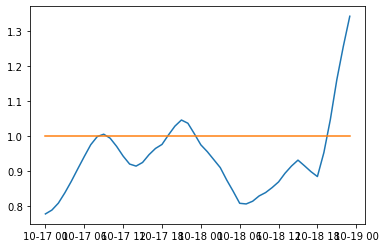

In [34]:
plt.clf()


plt.plot(dtime,means)
plt.plot(dtime,baseline)
plt.show()

In [21]:
a = [1,2,3]
b = [4,5,6]

c = list(zip(a,b))

str(c)

'[(1, 4), (2, 5), (3, 6)]'

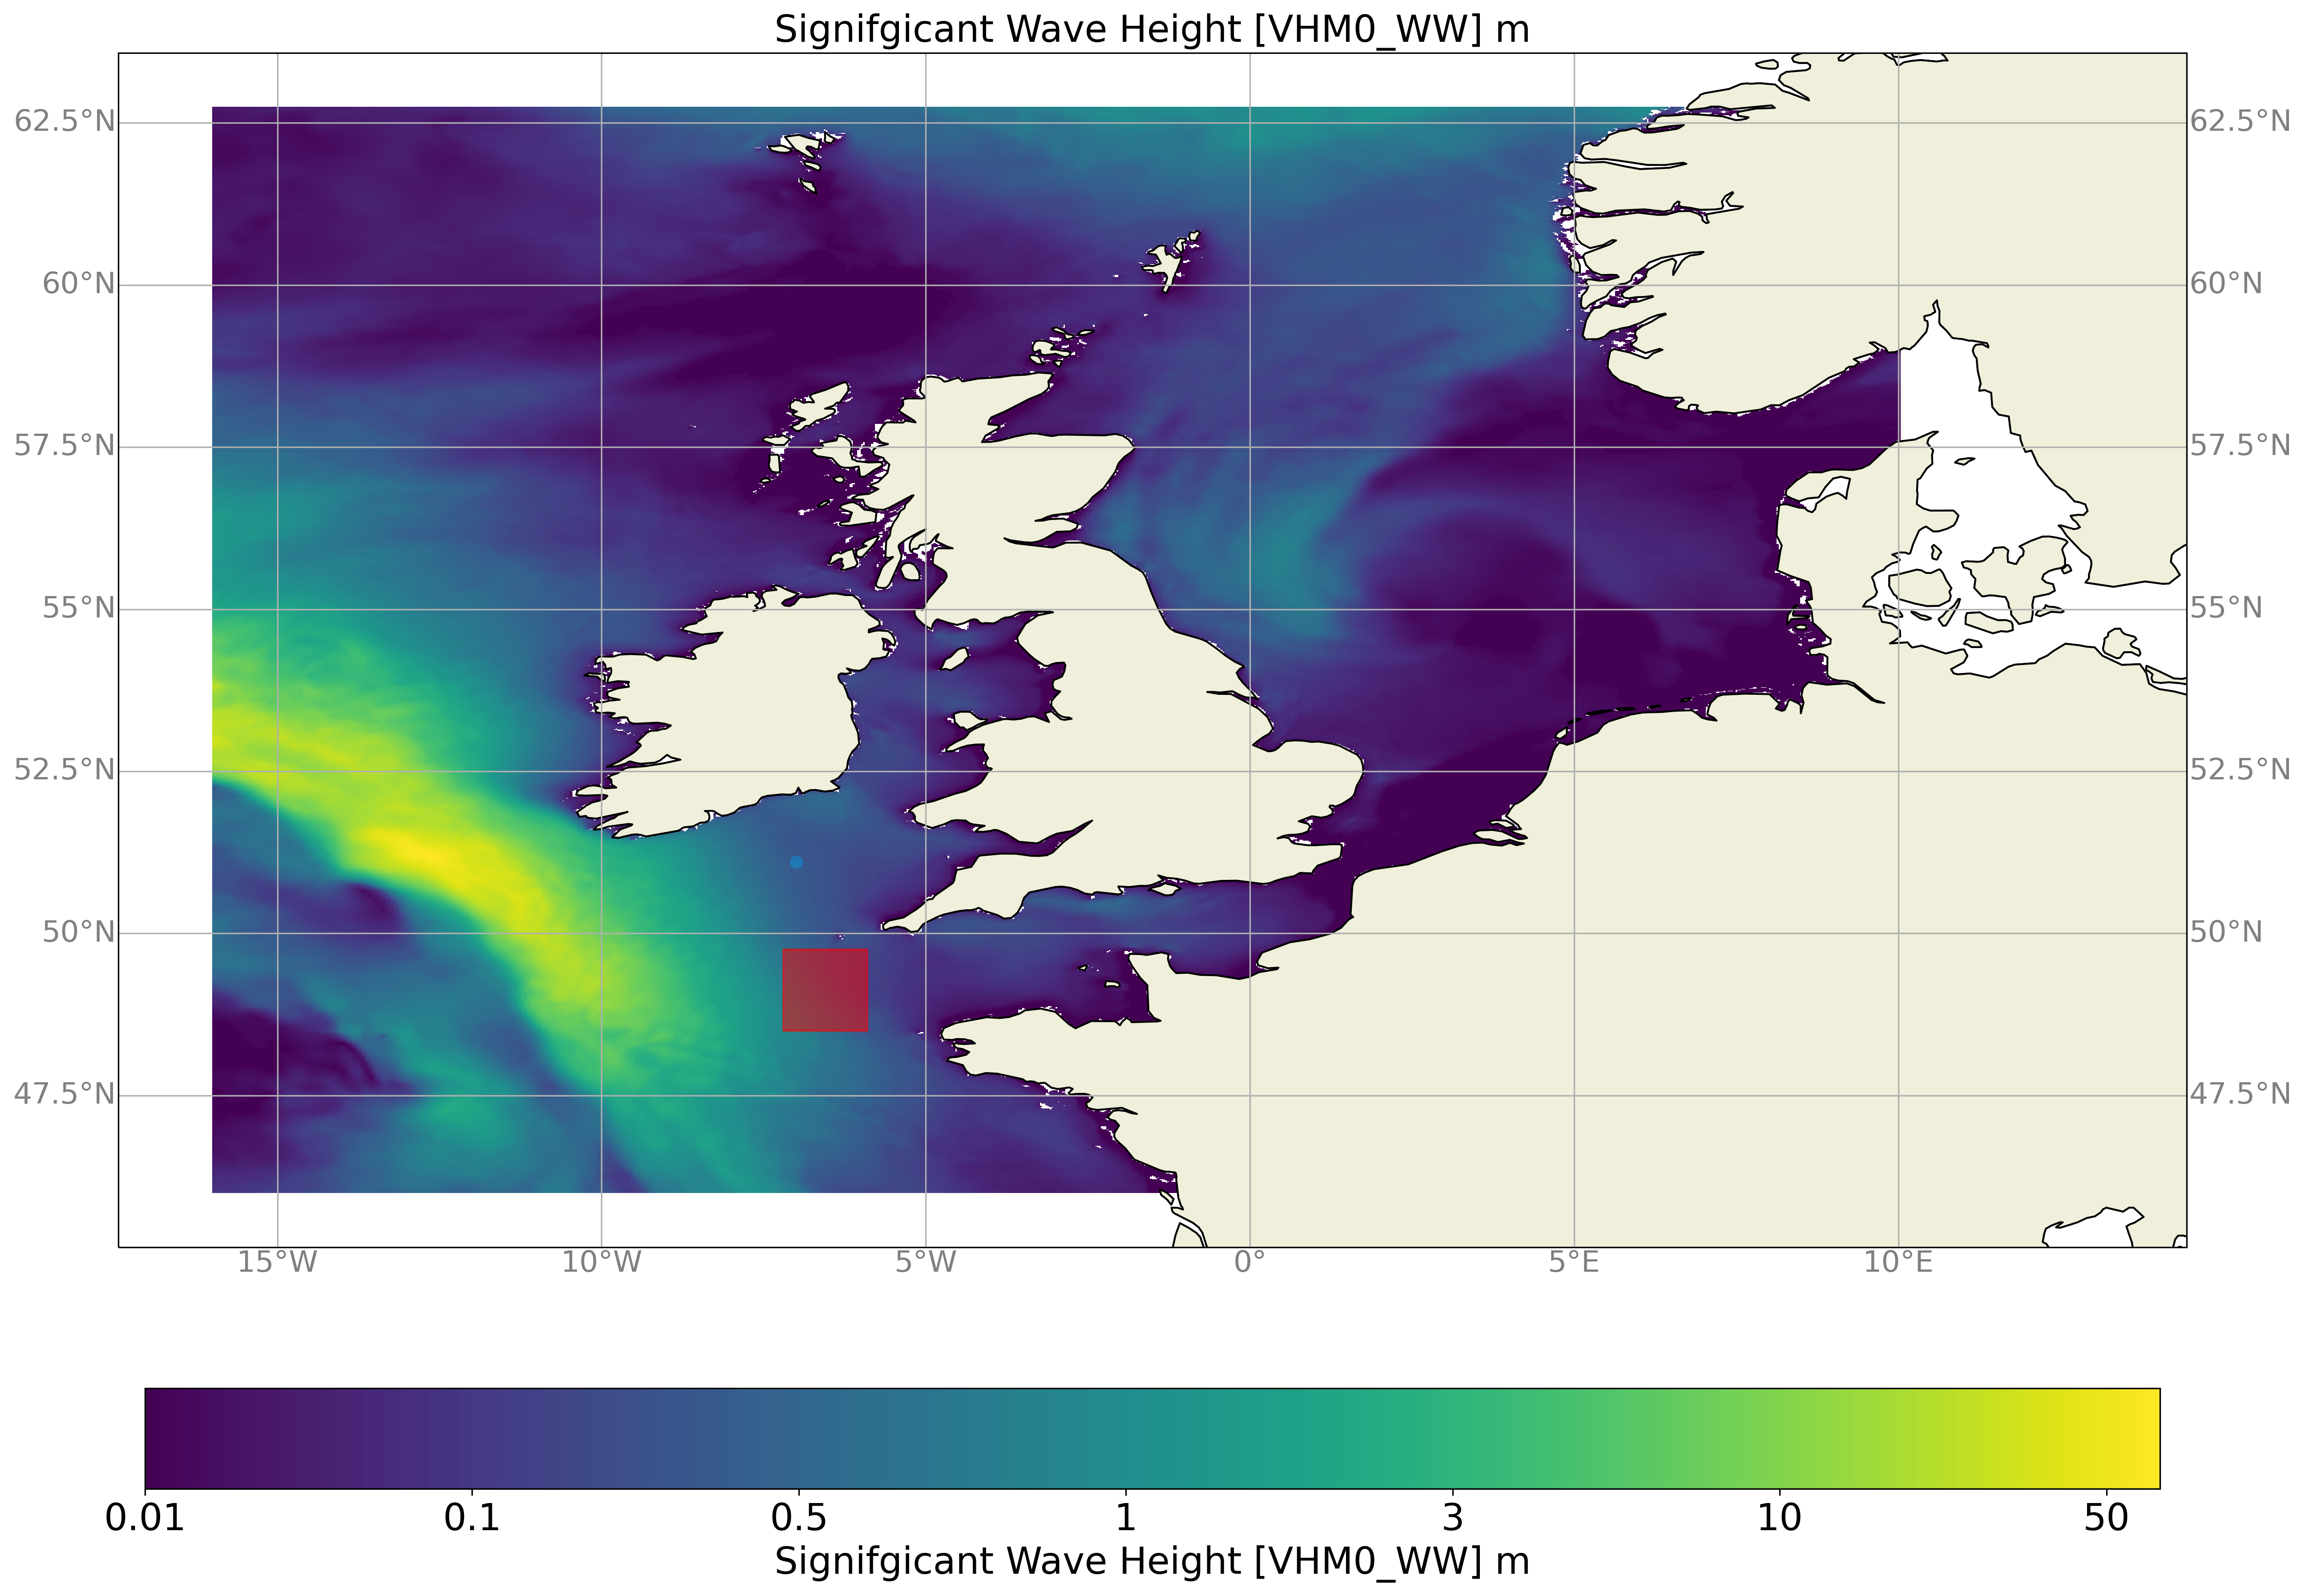

In [44]:
from shapely.geometry.polygon import LinearRing
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

land_resolution = '50m'
land_poly = cfeature.NaturalEarthFeature('physical', 'land', land_resolution,
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])
LAT = [48.5,49.75]
LON = [-7.2,-5.9]

lons = [-7.2, -7.2, -5.9, -5.9]
lats = [48.5, 49.75,49.75, 48.5]
ring = LinearRing(list(zip(lons, lats)))




fig1 = plt.figure(figsize=(20, 20), dpi=300)

m = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0))
f1 = plt.pcolormesh(lon_var, lat_var, np.ma.masked_invalid(nc_chl_data[10]), shading='flat')#, vmin=np.log10(0.01), vmax=np.log10(50), cmap=plt.cm.viridis)
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g1 = m.gridlines(draw_labels = True)
g1.xlabels_top = False
g1.xlabel_style = {'size': 16, 'color': 'gray'}
g1.ylabel_style = {'size': 16, 'color': 'gray'}
cbar = plt.colorbar(f1, orientation="horizontal", fraction=0.05, pad=0.07)#, ticks=[np.log10(0.01), np.log10(0.1),np.log10(0.5), np.log10(1),np.log10(3),np.log10(10),np.log10(50)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
cbar.set_label('Signifgicant Wave Height [VHM0_WW] m', fontsize=20)

# add area overlay
m.add_geometries([ring], ccrs.PlateCarree(), facecolor='red',alpha=0.5, edgecolor='red')

# add a single point overlay
m.scatter([-7],[51.1],transform=ccrs.PlateCarree())


plt.title('Signifgicant Wave Height [VHM0_WW] m', fontsize=20);
plt.show()

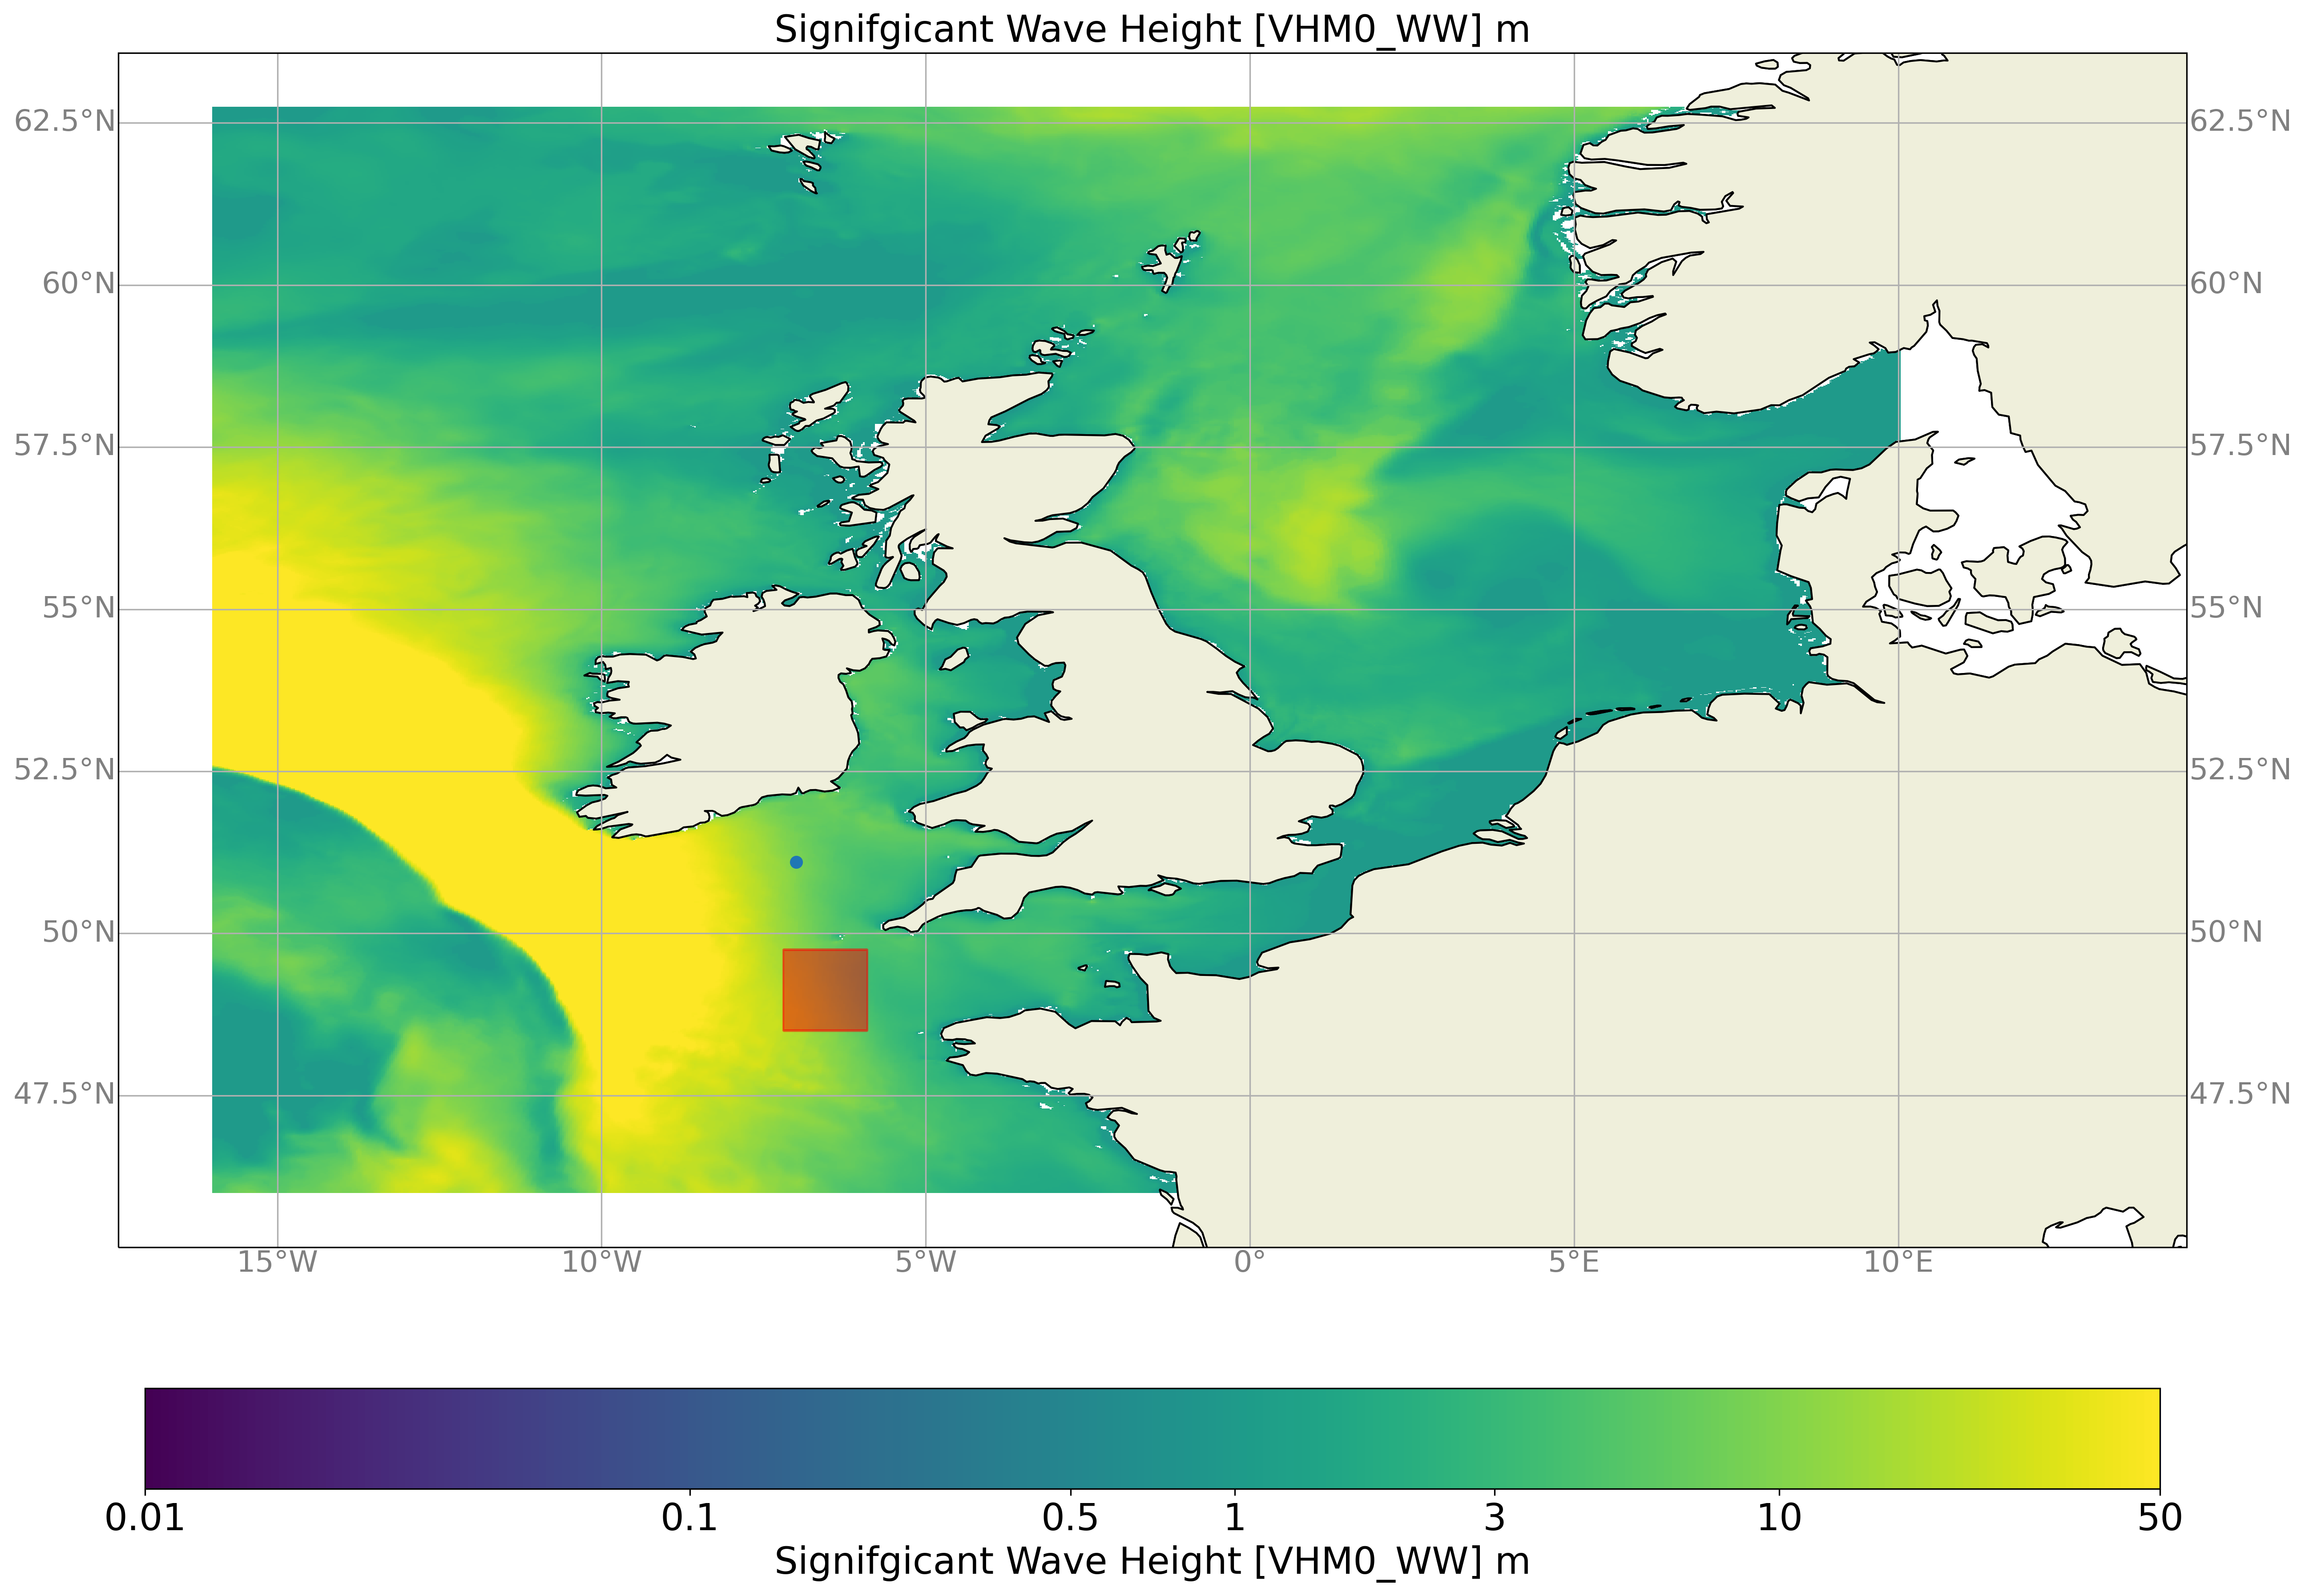

In [40]:
from shapely.geometry.polygon import LinearRing
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

land_resolution = '50m'
land_poly = cfeature.NaturalEarthFeature('physical', 'land', land_resolution,
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])
LAT = [48.5,49.75]
LON = [-7.2,-5.9]

lons = [-7.2, -7.2, -5.9, -5.9]
lats = [48.5, 49.75,49.75, 48.5]
ring = LinearRing(list(zip(lons, lats)))




fig1 = plt.figure(figsize=(20, 20), dpi=300)

m = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0))
f1 = plt.pcolormesh(lon_var, lat_var, np.ma.masked_invalid(nc_chl_data[6]), shading='flat', vmin=np.log10(0.01), vmax=np.log10(50), cmap=plt.cm.viridis)
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g1 = m.gridlines(draw_labels = True)
g1.xlabels_top = False
g1.xlabel_style = {'size': 16, 'color': 'gray'}
g1.ylabel_style = {'size': 16, 'color': 'gray'}
cbar = plt.colorbar(f1, orientation="horizontal", fraction=0.05, pad=0.07, ticks=[np.log10(0.01), np.log10(0.1),np.log10(0.5), np.log10(1),np.log10(3),np.log10(10),np.log10(50)]) 
cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
cbar.set_label('Signifgicant Wave Height [VHM0_WW] m', fontsize=20)

# add area overlay
m.add_geometries([ring], ccrs.PlateCarree(), facecolor='red',alpha=0.5, edgecolor='red')

# add a single point overlay
m.scatter([-7],[51.1],transform=ccrs.PlateCarree())


plt.title('Signifgicant Wave Height [VHM0_WW] m', fontsize=20);
plt.show()